In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Let us first do some data merging

In [25]:
df1 = pd.read_csv('LOTR 2.csv')
df1

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


In [4]:
df2 = pd.read_csv('LOTR.csv')
df2

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [5]:
## Merging the dataset
df1.merge(df2)

,FellowshipID,FirstName,Age,Skills
0,1001,Frodo,50,Hiding
1,1002,Samwise,39,Gardening


In [6]:
df1.merge(df2, how='inner')

,FellowshipID,FirstName,Age,Skills
0,1001,Frodo,50,Hiding
1,1002,Samwise,39,Gardening


In [7]:
df1.merge(df2, how='outer')

,FellowshipID,FirstName,Age,Skills
0,1001,Frodo,50.0,Hiding
1,1002,Samwise,39.0,Gardening
2,1003,Gandalf,NaN,Spells
3,1004,Pippin,NaN,Fireworks
4,1006,Legolas,2931.0,NaN
5,1007,Elrond,6520.0,NaN
6,1008,Barromir,51.0,NaN


In [8]:
df1.merge(df2, how='inner',on='FellowshipID')

,FellowshipID,FirstName_x,Age,FirstName_y,Skills
0,1001,Frodo,50,Frodo,Hiding
1,1002,Samwise,39,Samwise,Gardening


In [10]:
df1.merge(df2, how='inner',on=['FellowshipID','FirstName'])

,FellowshipID,FirstName,Age,Skills
0,1001,Frodo,50,Hiding
1,1002,Samwise,39,Gardening


In [11]:
df1.merge(df2, how='left')

,FellowshipID,FirstName,Age,Skills
0,1001,Frodo,50,Hiding
1,1002,Samwise,39,Gardening
2,1006,Legolas,2931,NaN
3,1007,Elrond,6520,NaN
4,1008,Barromir,51,NaN


In [12]:
df1.merge(df2, how='right')

,FellowshipID,FirstName,Age,Skills
0,1001,Frodo,50.0,Hiding
1,1002,Samwise,39.0,Gardening
2,1003,Gandalf,NaN,Spells
3,1004,Pippin,NaN,Fireworks


### Dealing with dates

In [26]:
df3 = pd.read_csv('supermarket_sales - Sheet1.csv')
df3.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
788,704-10-4056,C,Naypyitaw,Member,Male,Health and beauty,60.47,3,9.0705,190.4805,1/14/2019,10:55,Credit card,181.41,4.761905,9.0705,5.6
524,534-01-4457,A,Yangon,Normal,Male,Food and beverages,81.71,6,24.5130,514.7730,1/27/2019,14:36,Credit card,490.26,4.761905,24.5130,8.0
139,575-30-8091,A,Yangon,Normal,Male,Sports and travel,72.50,8,29.0000,609.0000,3/16/2019,19:25,Ewallet,580.00,4.761905,29.0000,9.2
273,633-91-1052,A,Yangon,Normal,Female,Home and lifestyle,12.03,2,1.2030,25.2630,1/27/2019,15:51,Cash,24.06,4.761905,1.2030,5.1
403,831-64-0259,B,Mandalay,Normal,Female,Fashion accessories,39.75,5,9.9375,208.6875,2/22/2019,10:43,Ewallet,198.75,4.761905,9.9375,9.6


In [15]:
df3.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [27]:
df3.drop(columns=['Invoice ID'],inplace=True)
df3

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [17]:
for key,value in df3.dtypes.items():
    print(f"{key} --------------> {value}")

Branch --------------> object
City --------------> object
Customer type --------------> object
Gender --------------> object
Product line --------------> object
Unit price --------------> float64
Quantity --------------> int64
Tax 5% --------------> float64
Total --------------> float64
Date --------------> object
Time --------------> object
Payment --------------> object
cogs --------------> float64
gross margin percentage --------------> float64
gross income --------------> float64
Rating --------------> float64


In [28]:
## Dealing with the date columns
import datetime

In [29]:
df3.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [42]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [43]:
df3.dtypes

Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [31]:
df3.columns


Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

<Axes: xlabel='Branch', ylabel='Total'>

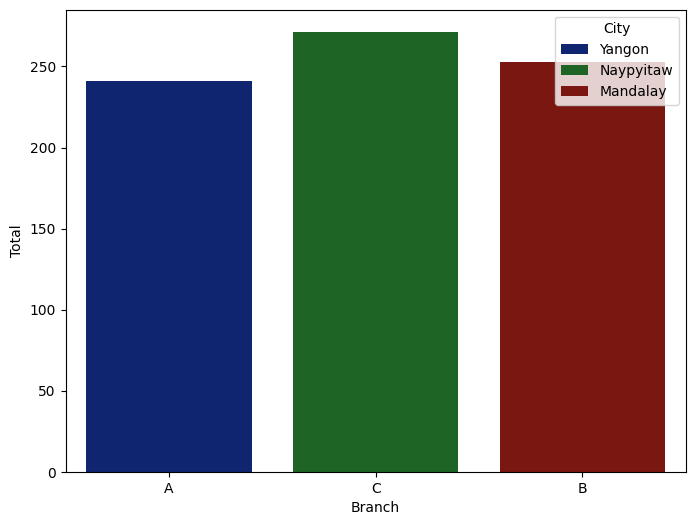

In [ ]:
## The total sales by Branch
plt.figure(figsize=(8,6))
sns.barplot(data=df3,x='Branch',y='Total',hue='City',estimator='median',errorbar=None,palette='dark6')

In [47]:
## Number of days of the transaction perion
total_days = (df3['Date'].max() - df3['Date'].min()).days
print(f'The salling period lasted for {total_days} days')

The salling period lasted for 88 days


In [46]:
## The months
total_months = (df3['Date'].max().month - df3['Date'].min().month)
print('The tolal months of sales are %s' %(total_months))

The tolal months of sales are 2


In [48]:
## Extracting the most selling months and days of the week
df3.sample(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
899,A,Yangon,Member,Male,Food and beverages,35.04,9,15.768,331.128,2019-02-09,19:17,Ewallet,315.36,4.761905,15.768,4.6
303,A,Yangon,Normal,Female,Electronic accessories,51.19,4,10.238,214.998,2019-03-18,17:15,Credit card,204.76,4.761905,10.238,4.7
526,B,Mandalay,Normal,Male,Fashion accessories,39.21,4,7.842,164.682,2019-01-16,20:03,Credit card,156.84,4.761905,7.842,9.0
739,A,Yangon,Normal,Male,Home and lifestyle,93.96,9,42.282,887.922,2019-03-20,11:32,Cash,845.64,4.761905,42.282,9.8
816,C,Naypyitaw,Normal,Female,Fashion accessories,45.44,7,15.904,333.984,2019-01-23,11:15,Cash,318.08,4.761905,15.904,9.2


In [53]:
from datetime import date

In [54]:
df3['Week_day_Name'] = df3.Date.dt.day_name()

In [55]:
df3.sample(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Week_day_Name
641,C,Naypyitaw,Member,Female,Electronic accessories,88.55,8,35.4200,743.8200,2019-03-19,15:29,Ewallet,708.40,4.761905,35.4200,4.7,Tuesday
827,A,Yangon,Member,Male,Fashion accessories,41.28,3,6.1920,130.0320,2019-03-26,18:37,Credit card,123.84,4.761905,6.1920,8.5,Tuesday
412,A,Yangon,Member,Male,Health and beauty,20.97,5,5.2425,110.0925,2019-01-04,13:21,Cash,104.85,4.761905,5.2425,7.8,Friday
17,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,2019-01-01,10:39,Credit card,435.66,4.761905,21.7830,6.9,Tuesday
255,B,Mandalay,Member,Male,Fashion accessories,32.62,4,6.5240,137.0040,2019-01-29,14:12,Cash,130.48,4.761905,6.5240,9.0,Tuesday


In [56]:
df3['Month'] = df3.Date.dt.month_name()

In [57]:
df3.head(4)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Week_day_Name,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January


In [58]:
df3.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Week_day_Name', 'Month'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Monday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Tuesday')])

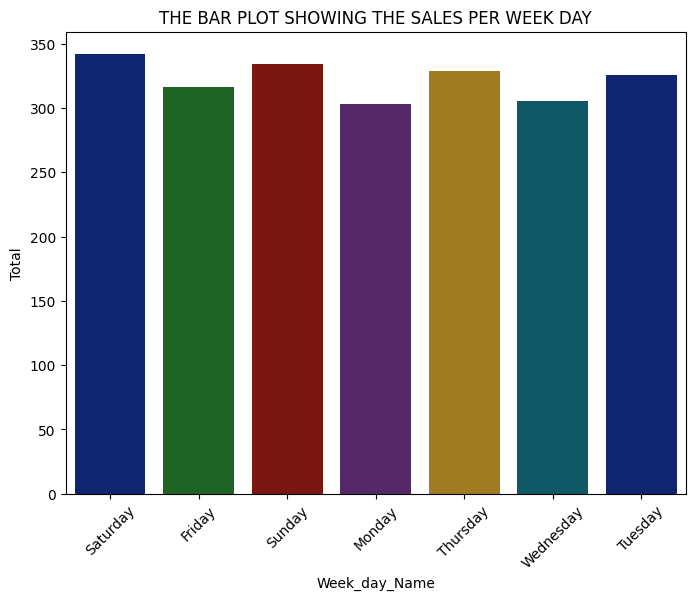

In [77]:
## Which day of the week had the highes sales
plt.figure(figsize=(8,6))
sns.barplot(data=df3,x='Week_day_Name',y='Total',hue='Week_day_Name',palette='dark6',errorbar=None)
plt.title('The bar plot showing the sales per week day'.upper())
plt.xticks(rotation = 45)

<Axes: xlabel='Month', ylabel='Total'>

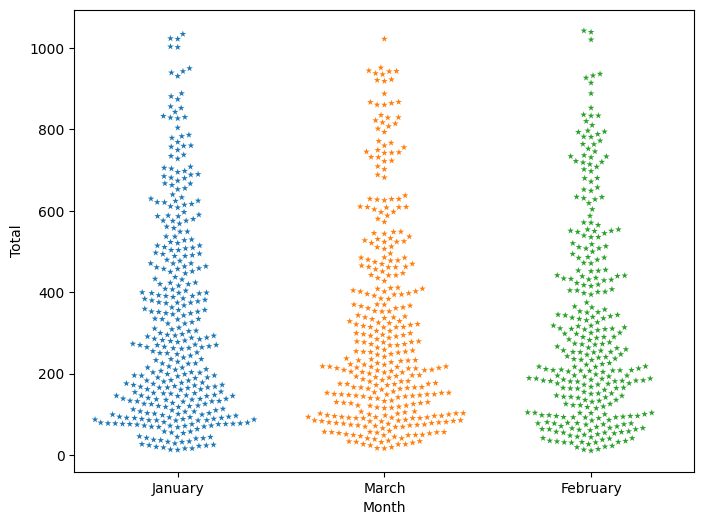

In [78]:
## Which Month had the highest sales
plt.figure(figsize=(8,6))
sns.swarmplot(data=df3,x='Month',y='Total',hue='Month',marker='*')

In [72]:
df3.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating',
       'Week_day_Name', 'Month'],
      dtype='object')

Text(0.5, 1.0, 'THE COUNT PLOT OF SELLING DAYS OF THE WEEK')

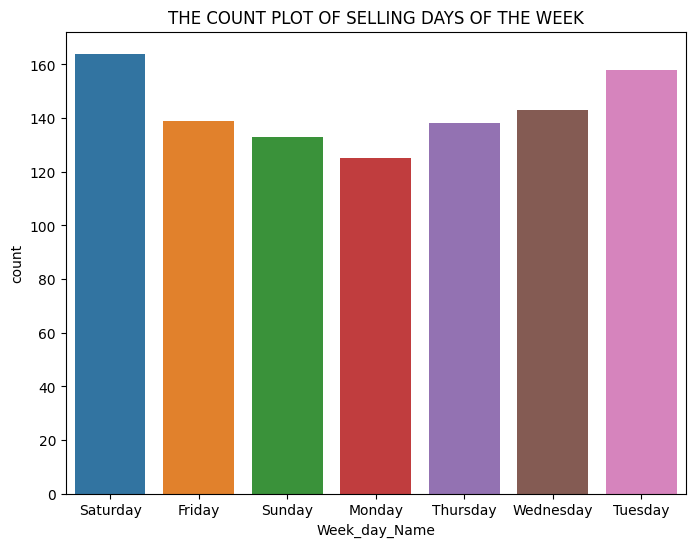

In [76]:
## Which week day had frequent sales
plt.figure(figsize=(8,6))
sns.countplot(data=df3,x='Week_day_Name',hue='Week_day_Name')
plt.title('The count plot of selling days of the week'.upper())